# Análisis de datos no estructurados: Análisis de Imágenes

### Autor: Felipe David Navarro Pecci

## Descripción:

En esta práctica se va a desarrollar un clasificador de imágenes para detectar si en dichas imágenes las personas están llevando mascarilla o no


## Workflow

Para el desarrollo de este proyecto se va a seguir el siguiente procedimiento

### Import de paquetes y librerías

In [1]:
## General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Limpieza de datos
import os
import xml.etree.ElementTree as et
import re

In [31]:
## Trabajo con imágenes

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import cv2





## Definición de funciones

In [ ]:
def print_image(img):
    

## Carga y limpieza de datos

Se va a trabajar con el siguiente dataset, obtenido de Kaggle: https://makeml.app/datasets/mask

Este dataset contiene 853 imágenes, pertenecientes a 3 clases:

+ Con mascarilla
+ Sin mascarilla
+ Con mascarilla llevada incorrectamente


Las imágenes vienen en formato PASCAL VOC. Por tanto el primer paso será extraer la información del xml para cada imagen.

Cabe señalar que hay algunas imágenes que contienen más de una persona y por tanto hay varios objetos definidos en el xml de esas imágenes.


In [27]:
dic = {"image": [],"Dimensions": []} # Diccionario donde guardo mis datos
for i in range(1,30): # 853
    dic[f'Object {i}']=[]
print("Generating data in CSV format....")

for file in os.listdir("./annotations"):
    row = []
    xml = et.parse("./annotations/"+file) 
    root = xml.getroot() # Apunto al nodo raíz
    img = root[1].text   # Nombre de la imagen
    row.append(img)
    h,w = root[2][0].text,root[2][1].text # Dimensiones: alto, ancho
    row.append([h,w]) 

    for i in range(4,len(root)): # Extraigo los tags y la posición de cada uno de los objetos contenidos en la imagen
        temp = []
        temp.append(root[i][0].text) # Extraigo el label
        for point in root[i][5]:     # Extraigo los límites de la "caja" que me delimita el objeto
            temp.append(point.text)
        row.append(temp)
    for i in range(len(row),32): # Para que mi dataframe contenga ceros en los elementos vacíos -- Máximo 30 objetos por imagen
        row.append(0)
    for i,each in enumerate(dic):
        dic[each].append(row[i])
df = pd.DataFrame(dic)

Generating data in CSV format....


In [29]:
# Compruebo que mi dataset se ha creado correctamente
df.head()

,image,Dimensions,Object 1,Object 2,Object 3,Object 4,Object 5,Object 6,Object 7,Object 8,...,Object 20,Object 21,Object 22,Object 23,Object 24,Object 25,Object 26,Object 27,Object 28,Object 29
848,maksssksksss95.png,"[301, 400]","[without_mask, 67, 289, 155, 400]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
849,maksssksksss96.png,"[400, 280]","[with_mask, 102, 97, 140, 135]","[without_mask, 64, 151, 110, 201]","[without_mask, 251, 88, 282, 124]","[with_mask, 296, 153, 335, 195]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
850,maksssksksss97.png,"[301, 400]","[with_mask, 187, 83, 212, 109]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
851,maksssksksss98.png,"[400, 267]","[with_mask, 196, 43, 236, 91]","[with_mask, 41, 73, 65, 95]","[with_mask, 263, 62, 287, 85]","[with_mask, 344, 80, 377, 106]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
852,maksssksksss99.png,"[400, 267]","[mask_weared_incorrect, 181, 54, 273, 162]","[with_mask, 99, 87, 176, 165]","[with_mask, 289, 99, 355, 233]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Una vez extraída la información del xml, se procede a escalar las imágenes y a separarlas en sub_carpetas para entrenamiento y validación.

También hay que generar los vectores de datos y de labels que se van a pasar al modelo para entrenarlo

In [ ]:
img_dir = "./images"

In [ ]:
img_dir = "./images/maksssksksss0.png"

In [39]:
img  = cv2.imread("./images/maksssksksss0.png")

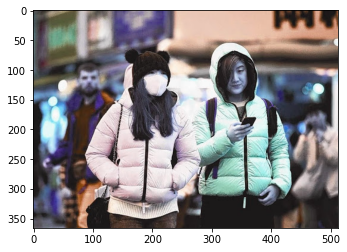

In [40]:
plt.imshow(img)

## Primer modelo básico 

## Data Augmentation

## Transfer learning

Dado que no se dispone de muchos datos, se va a partir del modelo VGG16

## Conclusiones

Para poder utilizar este modelo para detectar si alguien lleva o no mascarilla, faltaría añadir un pre-procesado que me permitiese anotar la imagen a tratar, definendo las "cajas" que enmarcan a cada una de las personas en esa imagen.

853 imágenes son pocas para un modelo de deep learning, sería interesante hacer data augmentation, pero al estar las imágenes anotadas no resulta sencillo